## Анализ взаимосвязи образа жизни и качества сна

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

__1. Преобработка данных__

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Переименуем названия столбцов

In [10]:
data = data.rename(columns=lambda c: c.replace(' ', '_'))

Оценим формат данных, наличие нулевых значений и дублей:

In [11]:
data.shape

(374, 13)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person_ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep_Duration           374 non-null    float64
 5   Quality_of_Sleep         374 non-null    int64  
 6   Physical_Activity_Level  374 non-null    int64  
 7   Stress_Level             374 non-null    int64  
 8   BMI_Category             374 non-null    object 
 9   Blood_Pressure           374 non-null    object 
 10  Heart_Rate               374 non-null    int64  
 11  Daily_Steps              374 non-null    int64  
 12  Sleep_Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [13]:
data.duplicated().sum()

0

In [14]:
data.describe()

,Person_ID,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


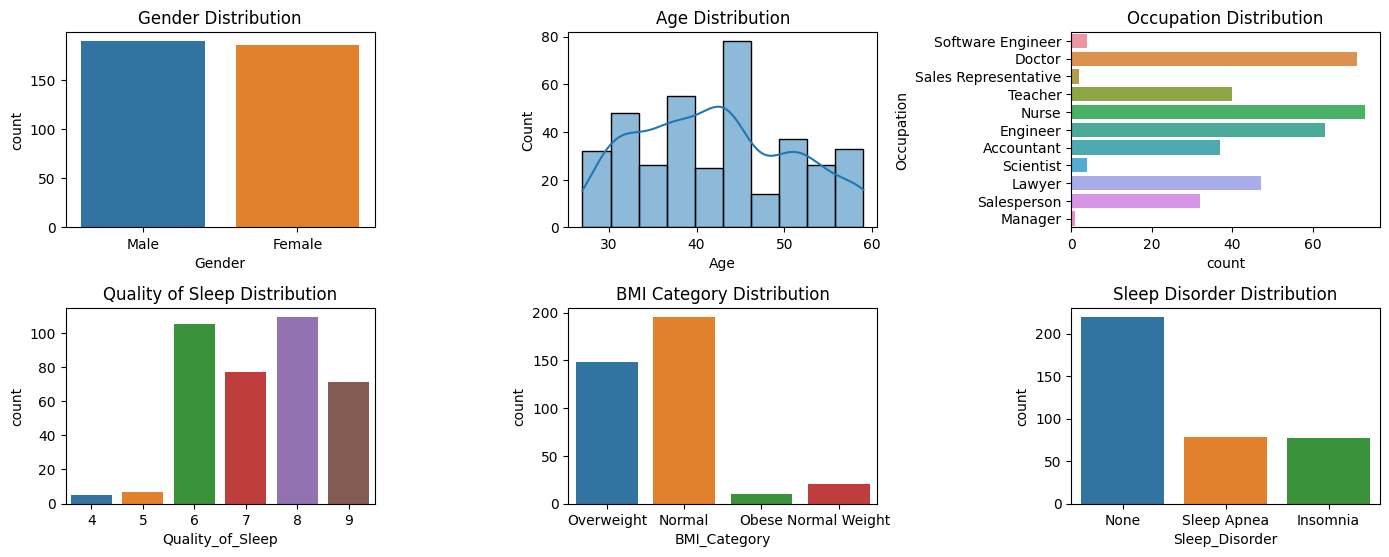

In [15]:
plt.figure(figsize=(14, 8))

# Gender
plt.subplot(3, 3, 1)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')

# Age
plt.subplot(3, 3, 2)
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')

# Occupation
plt.subplot(3, 3, 3)
sns.countplot(y='Occupation', data=data)
plt.title('Occupation Distribution')

# Quality of Sleep
plt.subplot(3, 3, 4)
sns.countplot(x='Quality_of_Sleep', data=data)
plt.title('Quality of Sleep Distribution')

# BMI Category
plt.subplot(3, 3, 5)
sns.countplot(x='BMI_Category', data=data)
plt.title('BMI Category Distribution')

# Daily Steps
plt.subplot(3, 3, 6)
sns.countplot(x='Sleep_Disorder', data=data)
plt.title('Sleep Disorder Distribution')

plt.tight_layout()
plt.show()

По предварительной оценке данных:
*   количество мужчин и женщин в выборке примерно одинаковое,
*   средний возраст исследуемых - 42 года (минимальный - 27 лет, макс - 59),
*   в основном встречается нормальный ИМТ и люди с избыточной массой тела,
*   топ-3 профессий среди иследуемых: медицинские сестры, врачи и инженеры,
*   качество сна в среднем оценивают на 7 баллов по шкале от 0 до 10 (мин - 4, макс - 9),
*   примерно у половины исследуемых нет проблем со сном,среди проблем отмечают - апноэ сна и бессоницу

Далее уберем персональную информацию и другие нечисловые столбцы

In [16]:
df = data[['Age', 'Sleep_Duration','Quality_of_Sleep', 'Physical_Activity_Level',
           'Stress_Level', 'Heart_Rate', 'Daily_Steps']]

Запишем в файл подготовленные исходные данные

In [17]:
df.to_csv('/content/drive/MyDrive/data_sleep_life.csv')

__2. Разведочный анализ и оценка взаимосвязи параметров__

In [18]:
# загружаем данные и убираем индексацию
data_sleep_life = pd.read_csv('/content/drive/MyDrive/data_sleep_life.csv',
                              index_col = 0)
data_sleep_life.head()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
4,28,5.9,4,30,8,85,3000


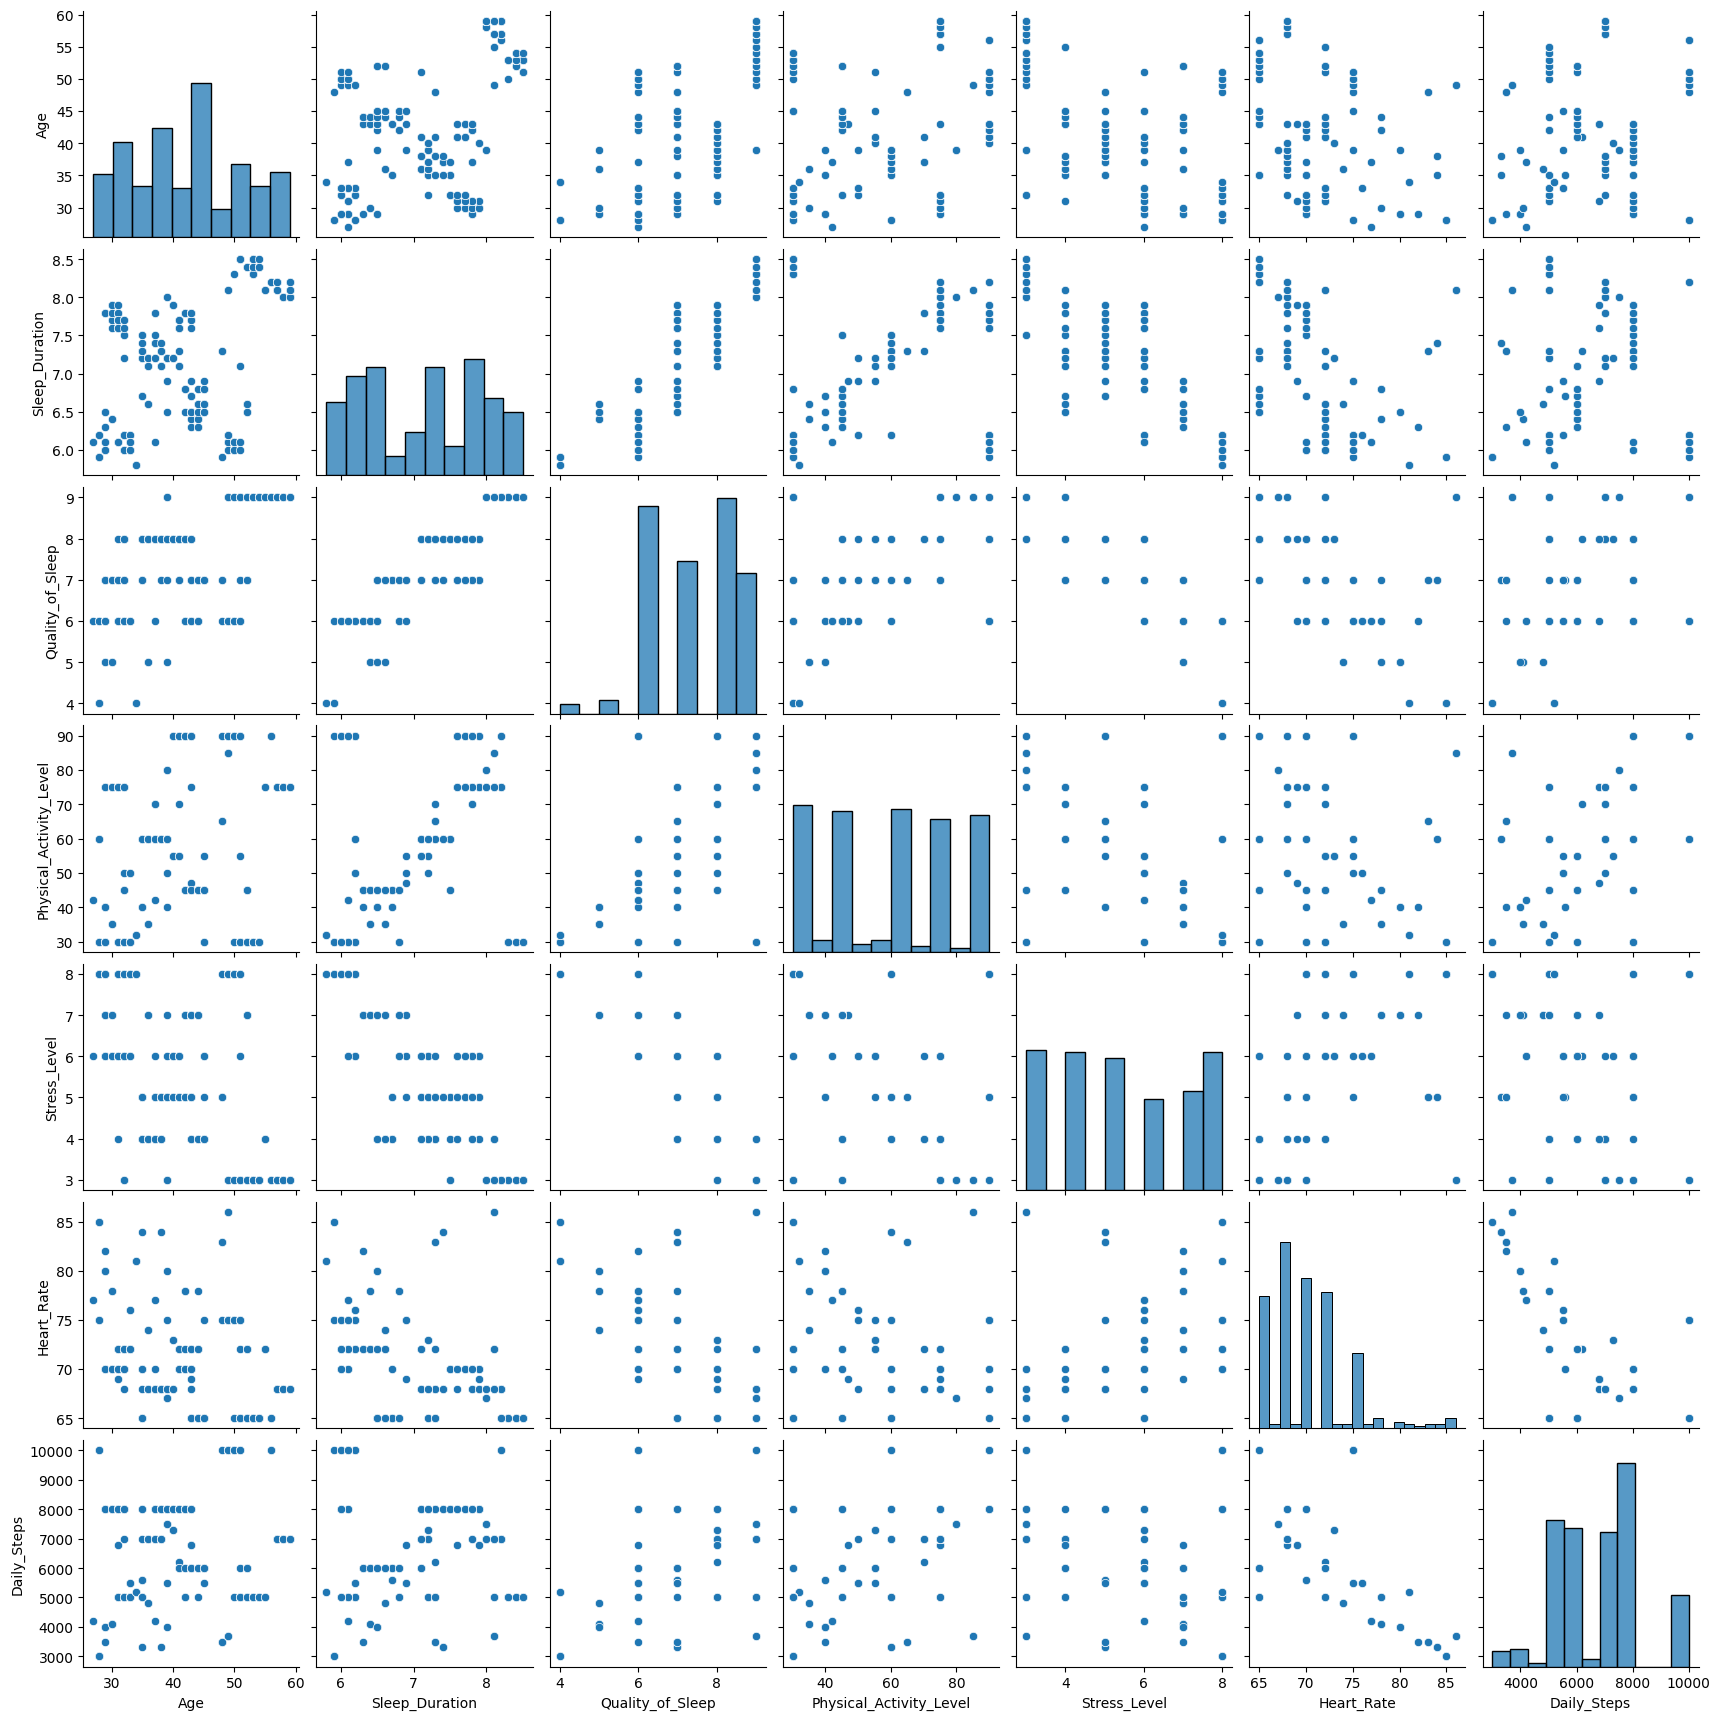

In [19]:
sns.pairplot(data_sleep_life)

In [20]:
data_sleep_life.corr()

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep_Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality_of_Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical_Activity_Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress_Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart_Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily_Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


<Axes: >

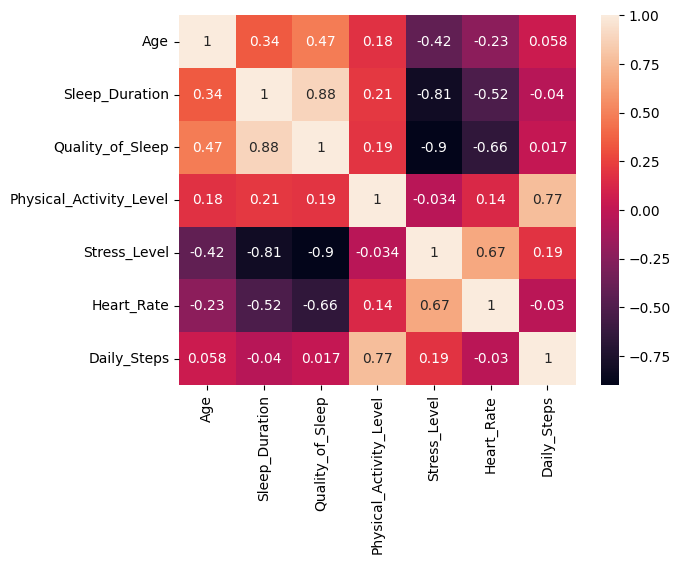

In [21]:
corr_matrix= data_sleep_life.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

Text(0.5, 1.0, 'Sleep_Duration VS Quality_of_Sleep')

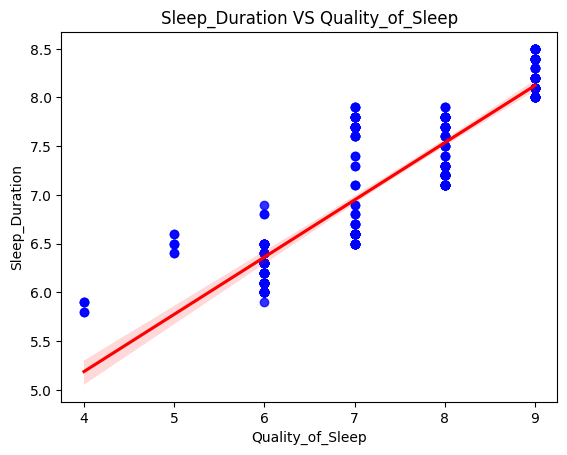

In [22]:
sns.regplot(x='Quality_of_Sleep',y='Sleep_Duration',data=data_sleep_life,
            scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Sleep_Duration VS Quality_of_Sleep')

Text(0.5, 1.0, 'Stress_Level VS Quality_Of_Sleep')

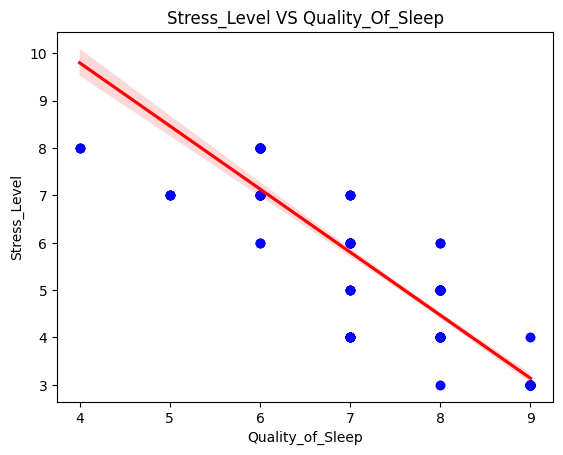

In [23]:
sns.regplot(x='Quality_of_Sleep',y='Stress_Level',data=data_sleep_life,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Stress_Level VS Quality_Of_Sleep')

- Качество сна(Quality_of_Sleep) имеет наиболее сильную положительную взаимосвязь с длительностью сна(Sleep_Duration)	и отрицательную - с уровнем стресса(Stress_Level).

Построим линейную модель

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
results = smf.ols('Quality_of_Sleep~Sleep_Duration + Stress_Level', data_sleep_life).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Quality_of_Sleep   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     1327.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          9.20e-170
Time:                        19:52:43   Log-Likelihood:                -205.05
No. Observations:                 374   AIC:                             416.1
Df Residuals:                     371   BIC:                             427.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.4118      0.431     10.

In [28]:
data_sleep_life.head(5)

,Age,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,Heart_Rate,Daily_Steps
0,27,6.1,6,42,6,77,4200
1,28,6.2,6,60,8,75,10000
2,28,6.2,6,60,8,75,10000
3,28,5.9,4,30,8,85,3000
4,28,5.9,4,30,8,85,3000


In [98]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
X, y = data_sleep_life[['Stress_Level', 'Sleep_Duration']], data_sleep_life['Quality_of_Sleep']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = linear_model.Lasso(alpha=0.01)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)


[-1.68172293  1.80277209]
7.236786785231858


In [99]:
y_predict = clf.predict(X_test)

In [100]:
scaler.data_range_

array([5. , 2.7])

In [101]:
clf.coef_/scaler.data_range_

array([-0.33634459,  0.66769337])

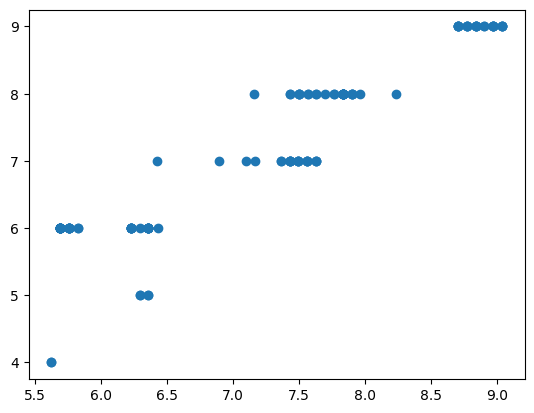

In [109]:
# plt.scatter(np.round(clf.predict(X_train)), y_train)
plt.scatter(y_predict, y_test)

In [106]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, np.round(clf.predict(X_train)), squared=False), mean_squared_error(y_test, np.round(y_predict), squared=False)

(0.4472135954999579, 0.4666282626286914)

Выводы:
- было выявлено, что качество сна имеет наиболее сильную положительную взаимосвязь с длительностью сна(0.88) и отрицательную - с уровнем стресса(0.9), при дальнейшем анализе линейной модели определили коээфициенты:
- если Stress_Level увеличивается на 1,5, то качество сна уменьшается на 0,3
- если Sleep_Duration уменьшается на 0.8, то качество сна уменьшается на 0,3